# Predicting Degenerative Disc Diagnosis in Chiropractic Patients

Author: Dillon Harding

In [261]:
# Installing dependencies and libraries

# If the following dependencies do not exist on your system, please delete the '#' before each code line below. 
# Afterwards, run the selected cells code

import sys
#!{sys.executable} -m pip install pandas
#!{sys.executable} -m pip install fastai
#!{sys.executable} -m pip install eli5

In [262]:
# Initializing Libraries
from fastai.tabular.all import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import eli5

In [210]:
path = r'https://raw.githubusercontent.com/DHUIUC/ISU_Honors_Thesis_2021/main/Machine_Learning/MedicalData2.csv'

In [211]:
# Reading CSV file using Pandas

df = pd.read_csv(path)
df.head()

,Degen Disc,Sex,Age,Accident,AccType,Concern,WhenSymptoms,Bettering,Painscale,IsSharp,...,wkHLabor,Smoking,Alcohol,Caffeine,Pregnant,Falls,HeadINj,BonInj,Dislocations,Surgeries
0,No,Female,40,No,NaN,back pain,years prior,No,7.0,True,...,True,True,False,True,No,NaN,NaN,NaN,left shoulder,NaN
1,No,Female,45,No,NaN,back pain,2 months prior,No,3.0,False,...,False,False,False,False,No,NaN,NaN,NaN,NaN,NaN
2,No,Female,29,No,NaN,rib pain/numbness,one month prior,NaN,NaN,True,...,False,False,False,True,Yes,NaN,NaN,ankle,NaN,ACL
3,No,Female,43,No,NaN,tennis elbow,4 months prior,NaN,5.0,False,...,False,False,True,True,No,NaN,NaN,NaN,NaN,childbirth - ovary removal - spinal fusion
4,No,Female,67,No,NaN,back pain,last week,Yes,3.0,False,...,False,False,False,True,No,NaN,NaN,NaN,NaN,tubal litigation - breast surgery


In [212]:
# Creating Dataloader from CSV data

dls = TabularDataLoaders.from_csv(path, y_names="Degen Disc",
    cat_names = ['Degen Disc', 'Sex', 'Accident',
                                'AccType', 'Concern', 'WhenSymptoms', 
                                'Bettering', 'IsSharp', 'isAching',
                                'isDull', 'IsNumb', 'isCramp',
                                'isBurning', 'isThrobbing', 'isTingling',
                                'isStiff', 'isSwelling', 'isShooting', 'IsOther',
                                'constPain', 'BettPain', 'Worsepain', 'painMove',
                                'intSleep', 'intWork', 'intDaily', 'intOther', 
                                'pnSit', 'pnStand', 'pnLay', 'pnBend', 'pnWalk',
                                'tkMedication', 'TKSurgery', 'TK_PT', 'TkChiro',
                                'TKOther', 'hasAIDS', 'hasEmphysema',
                                'hasMiscarriage', 'hasScarlet', 'hasAlcoholism',
                                'hasEpilepsy', 'hasMono', 'hasStroke', 
                                'hasAllergy', 'hasFractures', 'hasMS', 'hasSuicidal',
                                'hasAnemia', 'hasGlaucoma', 'hasThyroidP',
                                'hasAnorexia', 'hasGoiter', 'hasMumps',
                                'hasAppendicitis', 'hasGonorrhea', 'hasOsteoporosis',
                                'hasTonsillitis', 'hasArthiritis', 'hasGout', 
                                'hasPacemakr', 'hasTB', 'hasAsthma', 'hasHeartD',
                                'hasParkinsons', 'hasTumors', 'hasBleedingD', 
                                'hasHepatitis', 'hasHernia', 'hasPinchNerve', 
                                'hasTyphoid', 'hasBreastL', 'hasHerniatedD',
                                'hasPneumonia', 'hasUlcers', 'hasBronchitis',
                                'hasHerpes', 'hasPolio', 'hasVagInf', 
                                'hasBulimia', 'hasHighCH', 'hasProstateI', 
                                'hasCancer', 'hasVD', 'hasCataracts', 'hasKidneyD',
                                'hasProsthesis', 'hasChemDEP', 'hasLiverD', 
                                'hasPsychC', 'hasWhoopC', 'hasMeasles', 'hasRheumArth',
                                'hasChickenp', 'hasMigraines', 'hasOther', 'hasDiabetes',
                                'hasHeadaches', 'hasRheumF', 'Exercise', 'wkSit',
                                'wkStand', 'wkLLabor', 'wkHLabor', 'Smoking', 'Alcohol',
                                'Caffeine', 'Pregnant', 'Falls', 'HeadINj', 'BonInj',
                                'Dislocations', 'Surgeries'],
    cont_names = ['Age', 'Painscale'],
    procs = [Categorify, FillMissing, Normalize])

In [213]:
# Splitting Training data

splits = RandomSplitter(valid_pct=0.2)(range_of(df))

to = TabularPandas(df, procs=[Categorify, FillMissing],
                   cat_names = ['Sex', 'Accident',
                                'AccType', 'Concern', 'WhenSymptoms', 
                                'Bettering', 'IsSharp', 'isAching',
                                'isDull', 'IsNumb', 'isCramp',
                                'isBurning', 'isThrobbing', 'isTingling',
                                'isStiff', 'isSwelling', 'isShooting', 'IsOther',
                                'constPain', 'BettPain', 'Worsepain', 'painMove',
                                'intSleep', 'intWork', 'intDaily', 'intOther', 
                                'pnSit', 'pnStand', 'pnLay', 'pnBend', 'pnWalk',
                                'tkMedication', 'TKSurgery', 'TK_PT', 'TkChiro',
                                'TKOther', 'hasAIDS', 'hasEmphysema',
                                'hasMiscarriage', 'hasScarlet', 'hasAlcoholism',
                                'hasEpilepsy', 'hasMono', 'hasStroke', 
                                'hasAllergy', 'hasFractures', 'hasMS', 'hasSuicidal',
                                'hasAnemia', 'hasGlaucoma', 'hasThyroidP',
                                'hasAnorexia', 'hasGoiter', 'hasMumps',
                                'hasAppendicitis', 'hasGonorrhea', 'hasOsteoporosis',
                                'hasTonsillitis', 'hasArthiritis', 'hasGout', 
                                'hasPacemakr', 'hasTB', 'hasAsthma', 'hasHeartD',
                                'hasParkinsons', 'hasTumors', 'hasBleedingD', 
                                'hasHepatitis', 'hasHernia', 'hasPinchNerve', 
                                'hasTyphoid', 'hasBreastL', 'hasHerniatedD',
                                'hasPneumonia', 'hasUlcers', 'hasBronchitis',
                                'hasHerpes', 'hasPolio', 'hasVagInf', 
                                'hasBulimia', 'hasHighCH', 'hasProstateI', 
                                'hasCancer', 'hasVD', 'hasCataracts', 'hasKidneyD',
                                'hasProsthesis', 'hasChemDEP', 'hasLiverD', 
                                'hasPsychC', 'hasWhoopC', 'hasMeasles', 'hasRheumArth',
                                'hasChickenp', 'hasMigraines', 'hasOther', 'hasDiabetes',
                                'hasHeadaches', 'hasRheumF', 'Exercise', 'wkSit',
                                'wkStand', 'wkLLabor', 'wkHLabor', 'Smoking', 'Alcohol',
                                'Caffeine', 'Pregnant', 'Falls', 'HeadINj', 'BonInj',
                                'Dislocations', 'Surgeries'],
                   cont_names = ['Age', 'Painscale'],
                   y_names='Degen Disc',
                   splits=splits)

In [214]:
X_train, y_train = to.train.xs, to.train.ys.values.ravel()
X_test, y_test = to.valid.xs, to.valid.ys.values.ravel()

In [215]:
# Loading data to DataLoader

dls = to.dataloaders(bs=50)
dls.show_batch()

,Sex,Accident,AccType,Concern,WhenSymptoms,Bettering,IsSharp,isAching,isDull,IsNumb,isCramp,isBurning,isThrobbing,isTingling,isStiff,isSwelling,isShooting,IsOther,constPain,BettPain,Worsepain,painMove,intSleep,intWork,intDaily,intOther,pnSit,pnStand,pnLay,pnBend,pnWalk,tkMedication,TKSurgery,TK_PT,TkChiro,TKOther,hasAIDS,hasEmphysema,hasMiscarriage,hasScarlet,hasAlcoholism,hasEpilepsy,hasMono,hasStroke,hasAllergy,hasFractures,hasMS,hasSuicidal,hasAnemia,hasGlaucoma,hasThyroidP,hasAnorexia,hasGoiter,hasMumps,hasAppendicitis,hasGonorrhea,hasOsteoporosis,hasTonsillitis,hasArthiritis,hasGout,hasPacemakr,hasTB,hasAsthma,hasHeartD,hasParkinsons,hasTumors,hasBleedingD,hasHepatitis,hasHernia,hasPinchNerve,hasTyphoid,hasBreastL,hasHerniatedD,hasPneumonia,hasUlcers,hasBronchitis,hasHerpes,hasPolio,hasVagInf,hasBulimia,hasHighCH,hasProstateI,hasCancer,hasVD,hasCataracts,hasKidneyD,hasProsthesis,hasChemDEP,hasLiverD,hasPsychC,hasWhoopC,hasMeasles,hasRheumArth,hasChickenp,hasMigraines,hasOther,hasDiabetes,hasHeadaches,hasRheumF,Exercise,wkSit,wkStand,wkLLabor,wkHLabor,Smoking,Alcohol,Caffeine,Pregnant,Falls,HeadINj,BonInj,Dislocations,Surgeries,Painscale_na,Age,Painscale,Degen Disc
0,Female,No,#na#,joint and back pain,many years prior,Yes,False,True,False,False,False,False,False,False,False,False,False,False,#na#,ice,#na#,Stays,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,None,True,True,False,False,False,False,True,No,#na#,#na#,ankle,#na#,childbirth - tonsilectomy,True,35.0,6.0,No
1,Female,No,#na#,back pain,2 days prior,Yes,False,False,False,False,False,False,False,False,True,False,False,False,No,laying down,sitting,Stays,True,True,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,Daily,True,True,True,False,False,True,True,No,#na#,#na#,#na#,#na#,#na#,False,65.0,8.0,Yes
2,Female,No,#na#,sprained neck,#na#,Yes,True,False,False,False,False,False,False,False,True,False,False,False,Yes,no,#na#,Stays,True,True,True,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,None,False,True,False,False,False,False,False,No,#na#,#na#,#na#,#na#,#na#,False,37.0,8.0,No
3,Female,No,#na#,sinus tension,ongoing,No,False,False,True,False,False,False,True,False,False,False,False,False,No,sleeping,allergies,Stays,True,True,True,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,2-3 days a week,True,False,False,False,True,False,False,No,#na#,#na#,#na#,#na#,hysterectomy - tonsilectomy,False,39.0,6.0,No
4,Male,No,#na#,neck an

In [254]:
# Training
recall = Recall()
learn = tabular_learner(dls, metrics=recall)

# Testing
learn.fit_one_cycle(15)

epoch,train_loss,valid_loss,recall_score,time
0,0.857737,0.701015,1.000000,00:00
1,0.836548,0.700871,1.000000,00:00
2,0.777870,0.698944,1.000000,00:00
3,0.724391,0.695152,1.000000,00:00
4,0.678748,0.690478,0.800000,00:00
5,0.648892,0.688649,0.800000,00:00
6,0.619727,0.688152,0.900000,00:00
7,0.587946,0.687450,0.900000,00:00
8,0.558318,0.684284,0.800000,00:00
9,0.528949,0.682217,0.800000,00:00


In [250]:
#Predicted value generated from model

row, clas, probs = learn.predict(df.iloc[77])
row.show()

,Sex,Accident,AccType,Concern,WhenSymptoms,Bettering,IsSharp,isAching,isDull,IsNumb,isCramp,isBurning,isThrobbing,isTingling,isStiff,isSwelling,isShooting,IsOther,constPain,BettPain,Worsepain,painMove,intSleep,intWork,intDaily,intOther,pnSit,pnStand,pnLay,pnBend,pnWalk,tkMedication,TKSurgery,TK_PT,TkChiro,TKOther,hasAIDS,hasEmphysema,hasMiscarriage,hasScarlet,hasAlcoholism,hasEpilepsy,hasMono,hasStroke,hasAllergy,hasFractures,hasMS,hasSuicidal,hasAnemia,hasGlaucoma,hasThyroidP,hasAnorexia,hasGoiter,hasMumps,hasAppendicitis,hasGonorrhea,hasOsteoporosis,hasTonsillitis,hasArthiritis,hasGout,hasPacemakr,hasTB,hasAsthma,hasHeartD,hasParkinsons,hasTumors,hasBleedingD,hasHepatitis,hasHernia,hasPinchNerve,hasTyphoid,hasBreastL,hasHerniatedD,hasPneumonia,hasUlcers,hasBronchitis,hasHerpes,hasPolio,hasVagInf,hasBulimia,hasHighCH,hasProstateI,hasCancer,hasVD,hasCataracts,hasKidneyD,hasProsthesis,hasChemDEP,hasLiverD,hasPsychC,hasWhoopC,hasMeasles,hasRheumArth,hasChickenp,hasMigraines,hasOther,hasDiabetes,hasHeadaches,hasRheumF,Exercise,wkSit,wkStand,wkLLabor,wkHLabor,Smoking,Alcohol,Caffeine,Pregnant,Falls,HeadINj,BonInj,Dislocations,Surgeries,Painscale_na,Age,Painscale,Degen Disc
0,Female,No,#na#,neck pain,2 weeks prior,Yes,False,True,True,False,False,False,False,False,True,True,False,False,Yes,no,no,Stays,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2-3 days a week,False,False,False,False,False,False,False,No,#na#,#na#,shin,#na#,#na#,False,23.0,5.0,No


In [218]:
classifier=RandomForestClassifier()
classifier=classifier.fit(X_train,y_train)
predicted=classifier.predict(X_test)
 
#printing the results
print ('Confusion Matrix :')
print(confusion_matrix(y_test, predicted))
print ('Accuracy Score :',accuracy_score(y_test, predicted))
print ('Report : ')
print (classification_report(y_test, predicted))

Confusion Matrix :
[[20  1]
 [ 5  5]]
Accuracy Score : 0.8064516129032258
Report : 
              precision    recall  f1-score   support

           0       0.80      0.95      0.87        21
           1       0.83      0.50      0.62        10

    accuracy                           0.81        31
   macro avg       0.82      0.73      0.75        31
weighted avg       0.81      0.81      0.79        31



In [264]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(4, 3)
    (1): Embedding(3, 3)
    (2): Embedding(5, 4)
    (3): Embedding(71, 17)
    (4): Embedding(61, 16)
    (5): Embedding(4, 3)
    (6): Embedding(3, 3)
    (7): Embedding(3, 3)
    (8): Embedding(3, 3)
    (9): Embedding(3, 3)
    (10): Embedding(3, 3)
    (11): Embedding(3, 3)
    (12): Embedding(3, 3)
    (13): Embedding(3, 3)
    (14): Embedding(3, 3)
    (15): Embedding(3, 3)
    (16): Embedding(3, 3)
    (17): Embedding(3, 3)
    (18): Embedding(3, 3)
    (19): Embedding(38, 12)
    (20): Embedding(37, 12)
    (21): Embedding(3, 3)
    (22): Embedding(3, 3)
    (23): Embedding(3, 3)
    (24): Embedding(3, 3)
    (25): Embedding(3, 3)
    (26): Embedding(3, 3)
    (27): Embedding(3, 3)
    (28): Embedding(3, 3)
    (29): Embedding(3, 3)
    (30): Embedding(3, 3)
    (31): Embedding(3, 3)
    (32): Embedding(3, 3)
    (33): Embedding(3, 3)
    (34): Embedding(3, 3)
    (35): Embedding(3, 3)
    (36): Embedding(2, 2)
  

In [272]:
columns =                      [ 'Sex', 'Accident',
                                'AccType', 'Concern', 'WhenSymptoms', 
                                'Bettering', 'IsSharp', 'isAching',
                                'isDull', 'IsNumb', 'isCramp',
                                'isBurning', 'isThrobbing', 'isTingling',
                                'isStiff', 'isSwelling', 'isShooting', 'IsOther',
                                'constPain', 'BettPain', 'Worsepain', 'painMove',
                                'intSleep', 'intWork', 'intDaily', 'intOther', 
                                'pnSit', 'pnStand', 'pnLay', 'pnBend', 'pnWalk',
                                'tkMedication', 'TKSurgery', 'TK_PT', 'TkChiro',
                                'TKOther', 'hasAIDS', 'hasEmphysema',
                                'hasMiscarriage', 'hasScarlet', 'hasAlcoholism',
                                'hasEpilepsy', 'hasMono', 'hasStroke', 
                                'hasAllergy', 'hasFractures', 'hasMS', 'hasSuicidal',
                                'hasAnemia', 'hasGlaucoma', 'hasThyroidP',
                                'hasAnorexia', 'hasGoiter', 'hasMumps',
                                'hasAppendicitis', 'hasGonorrhea', 'hasOsteoporosis',
                                'hasTonsillitis', 'hasArthiritis', 'hasGout', 
                                'hasPacemakr', 'hasTB', 'hasAsthma', 'hasHeartD',
                                'hasParkinsons', 'hasTumors', 'hasBleedingD', 
                                'hasHepatitis', 'hasHernia', 'hasPinchNerve', 
                                'hasTyphoid', 'hasBreastL', 'hasHerniatedD',
                                'hasPneumonia', 'hasUlcers', 'hasBronchitis',
                                'hasHerpes', 'hasPolio', 'hasVagInf', 
                                'hasBulimia', 'hasHighCH', 'hasProstateI', 
                                'hasCancer', 'hasVD', 'hasCataracts', 'hasKidneyD',
                                'hasProsthesis', 'hasChemDEP', 'hasLiverD', 
                                'hasPsychC', 'hasWhoopC', 'hasMeasles', 'hasRheumArth',
                                'hasChickenp', 'hasMigraines', 'hasOther', 'hasDiabetes',
                                'hasHeadaches', 'hasRheumF', 'Exercise', 'wkSit',
                                'wkStand', 'wkLLabor', 'wkHLabor', 'Smoking', 'Alcohol',
                                'Caffeine', 'Pregnant', 'Falls', 'HeadINj', 'BonInj',
                                'Dislocations', 'Surgeries','painscaleNA', 'Age', 'Painscale', ]
feature_names = columns

eli5.show_weights(classifier, feature_names = feature_names)

Weight,Feature
0.1276 ± 0.2307,Age
0.0635 ± 0.1214,Concern
0.0396 ± 0.1069,Surgeries
0.0349 ± 0.0794,WhenSymptoms
0.0281 ± 0.0780,BettPain
0.0256 ± 0.0632,Painscale
0.0254 ± 0.0819,hasWhoopC
0.0245 ± 0.0630,Worsepain
0.0227 ± 0.0763,TkChiro
0.0191 ± 0.0772,hasHernia


In [279]:
eli5.show_prediction(classifier,X_train.values[2],
feature_names=feature_names, top=100, show_feature_values=True)

Text(0, 0.5, 'Count')

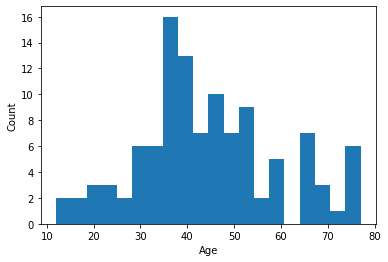

In [288]:
negative = df[df['Degen Disc'] == 'No']
positive = df[df['Degen Disc'] == 'Yes']

plt.hist(negative['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

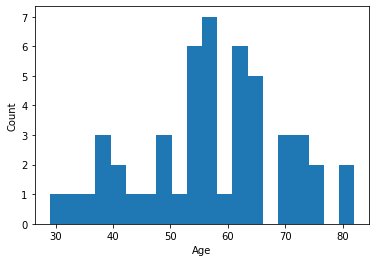

In [289]:
plt.hist(positive['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')

No Degen. Disc


<AxesSubplot:>

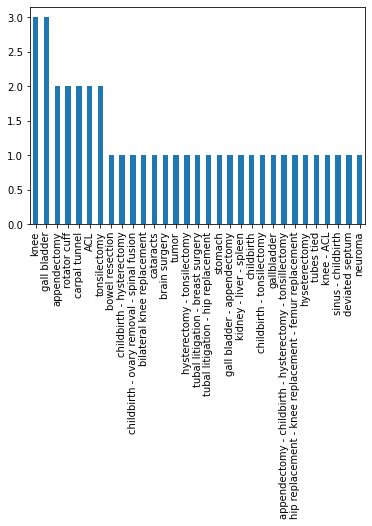

In [303]:
print('No Degen. Disc')
negative['Surgeries'].value_counts().plot.bar()


Has Degen. Disc


<AxesSubplot:>

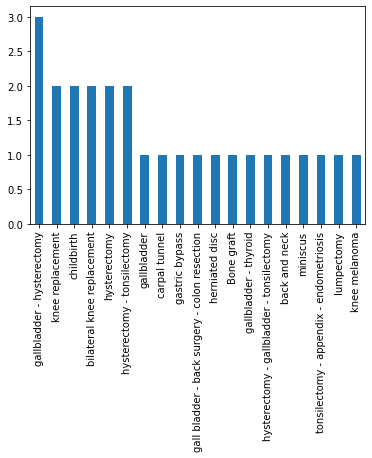

In [302]:
print('Has Degen. Disc')
positive['Surgeries'].value_counts().plot.bar()
 